### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from pandas.plotting import parallel_coordinates
from itertools import cycle, islice
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error, accuracy_score
from math import sqrt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

### Understanding the data

In [2]:
churn = pd.read_csv('Churn.csv')
pd.set_option('display.max_columns', None)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn.groupby('Churn').agg(np.mean)

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


### Data Manipulation

In [88]:
# using most important features derived from box plots below
churn.groupby(['Partner', 'Dependents','InternetService', 'StreamingTV', 'StreamingMovies'])['Churn'].describe()

count  \
Partner Dependents InternetService StreamingTV         StreamingMovies              
No      No         DSL             No                  No                   602.0   
                                                       Yes                  161.0   
                                   Yes                 No                   134.0   
                                                       Yes                  205.0   
                   Fiber optic     No                  No                   535.0   
                                                       Yes                  217.0   
                                   Yes                 No                   217.0   
                                                       Yes                  538.0   
                   No              No internet service No internet service  671.0   
        Yes        DSL             No                  No                    91.0   
                                                       Yes                   18.0   
                                   Yes                 No                    17.0   
                                                       Yes                   25.0   
                   Fiber optic     No                  No                    33.0   
                                                       Yes                   10.0   
                                   Yes                 No                    13.0   
                                                       Yes                   37.0   
                   No              No internet service No internet service  117.0   
Yes     No         DSL             No                  No                   178.0   
                                                       Yes                   84.0   
                                   Yes                 No                    72.0   
                                                       Yes                  180.0   
                   Fiber optic     No                  No                   222.0   
                                                       Yes                  129.0   
                                   Yes                 No                   114.0   
                                                       Yes                  462.0   
                   No              No internet service No internet service  212.0   
        Yes        DSL             No                  No                   242.0   
                                                       Yes                   88.0   
                                   Yes                 No                   104.0   
                                                       Yes                  220.0   
                   Fiber optic     No                  No                   115.0   
                                                       Yes                   85.0   
                                   Yes                 No                    96.0   
                                                       Yes                  273.0   
                   No              No internet service No internet service  526.0   

                                                                                mean  \
Partner Dependents InternetService StreamingTV         StreamingMovies                 
No      No         DSL             No                  No                   0.310631   
                                                       Yes                  0.236025   
                                   Yes                 No                   0.231343   
                                                       Yes                  0.185366   
                   Fiber optic     No                  No                   0.512150   
                                                       Yes                  0.506912   
                                   Yes                 No                   0.520737   
                                                     

#### Above trend clearly shows that customers who are not partners, have no dependents, have no internet and streaming service are more likely to churn

In [9]:
# let's set the categorical variables 
churn[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
       'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
       'Churn']] = churn[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                          'PaperlessBilling','PaymentMethod','Churn']].astype('category')
churn.dtypes

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object

### Data Visualization

Text(0.5, 0.98, 'Comparing Variables Affecting Churn w.r.t. MonthlyCharges')

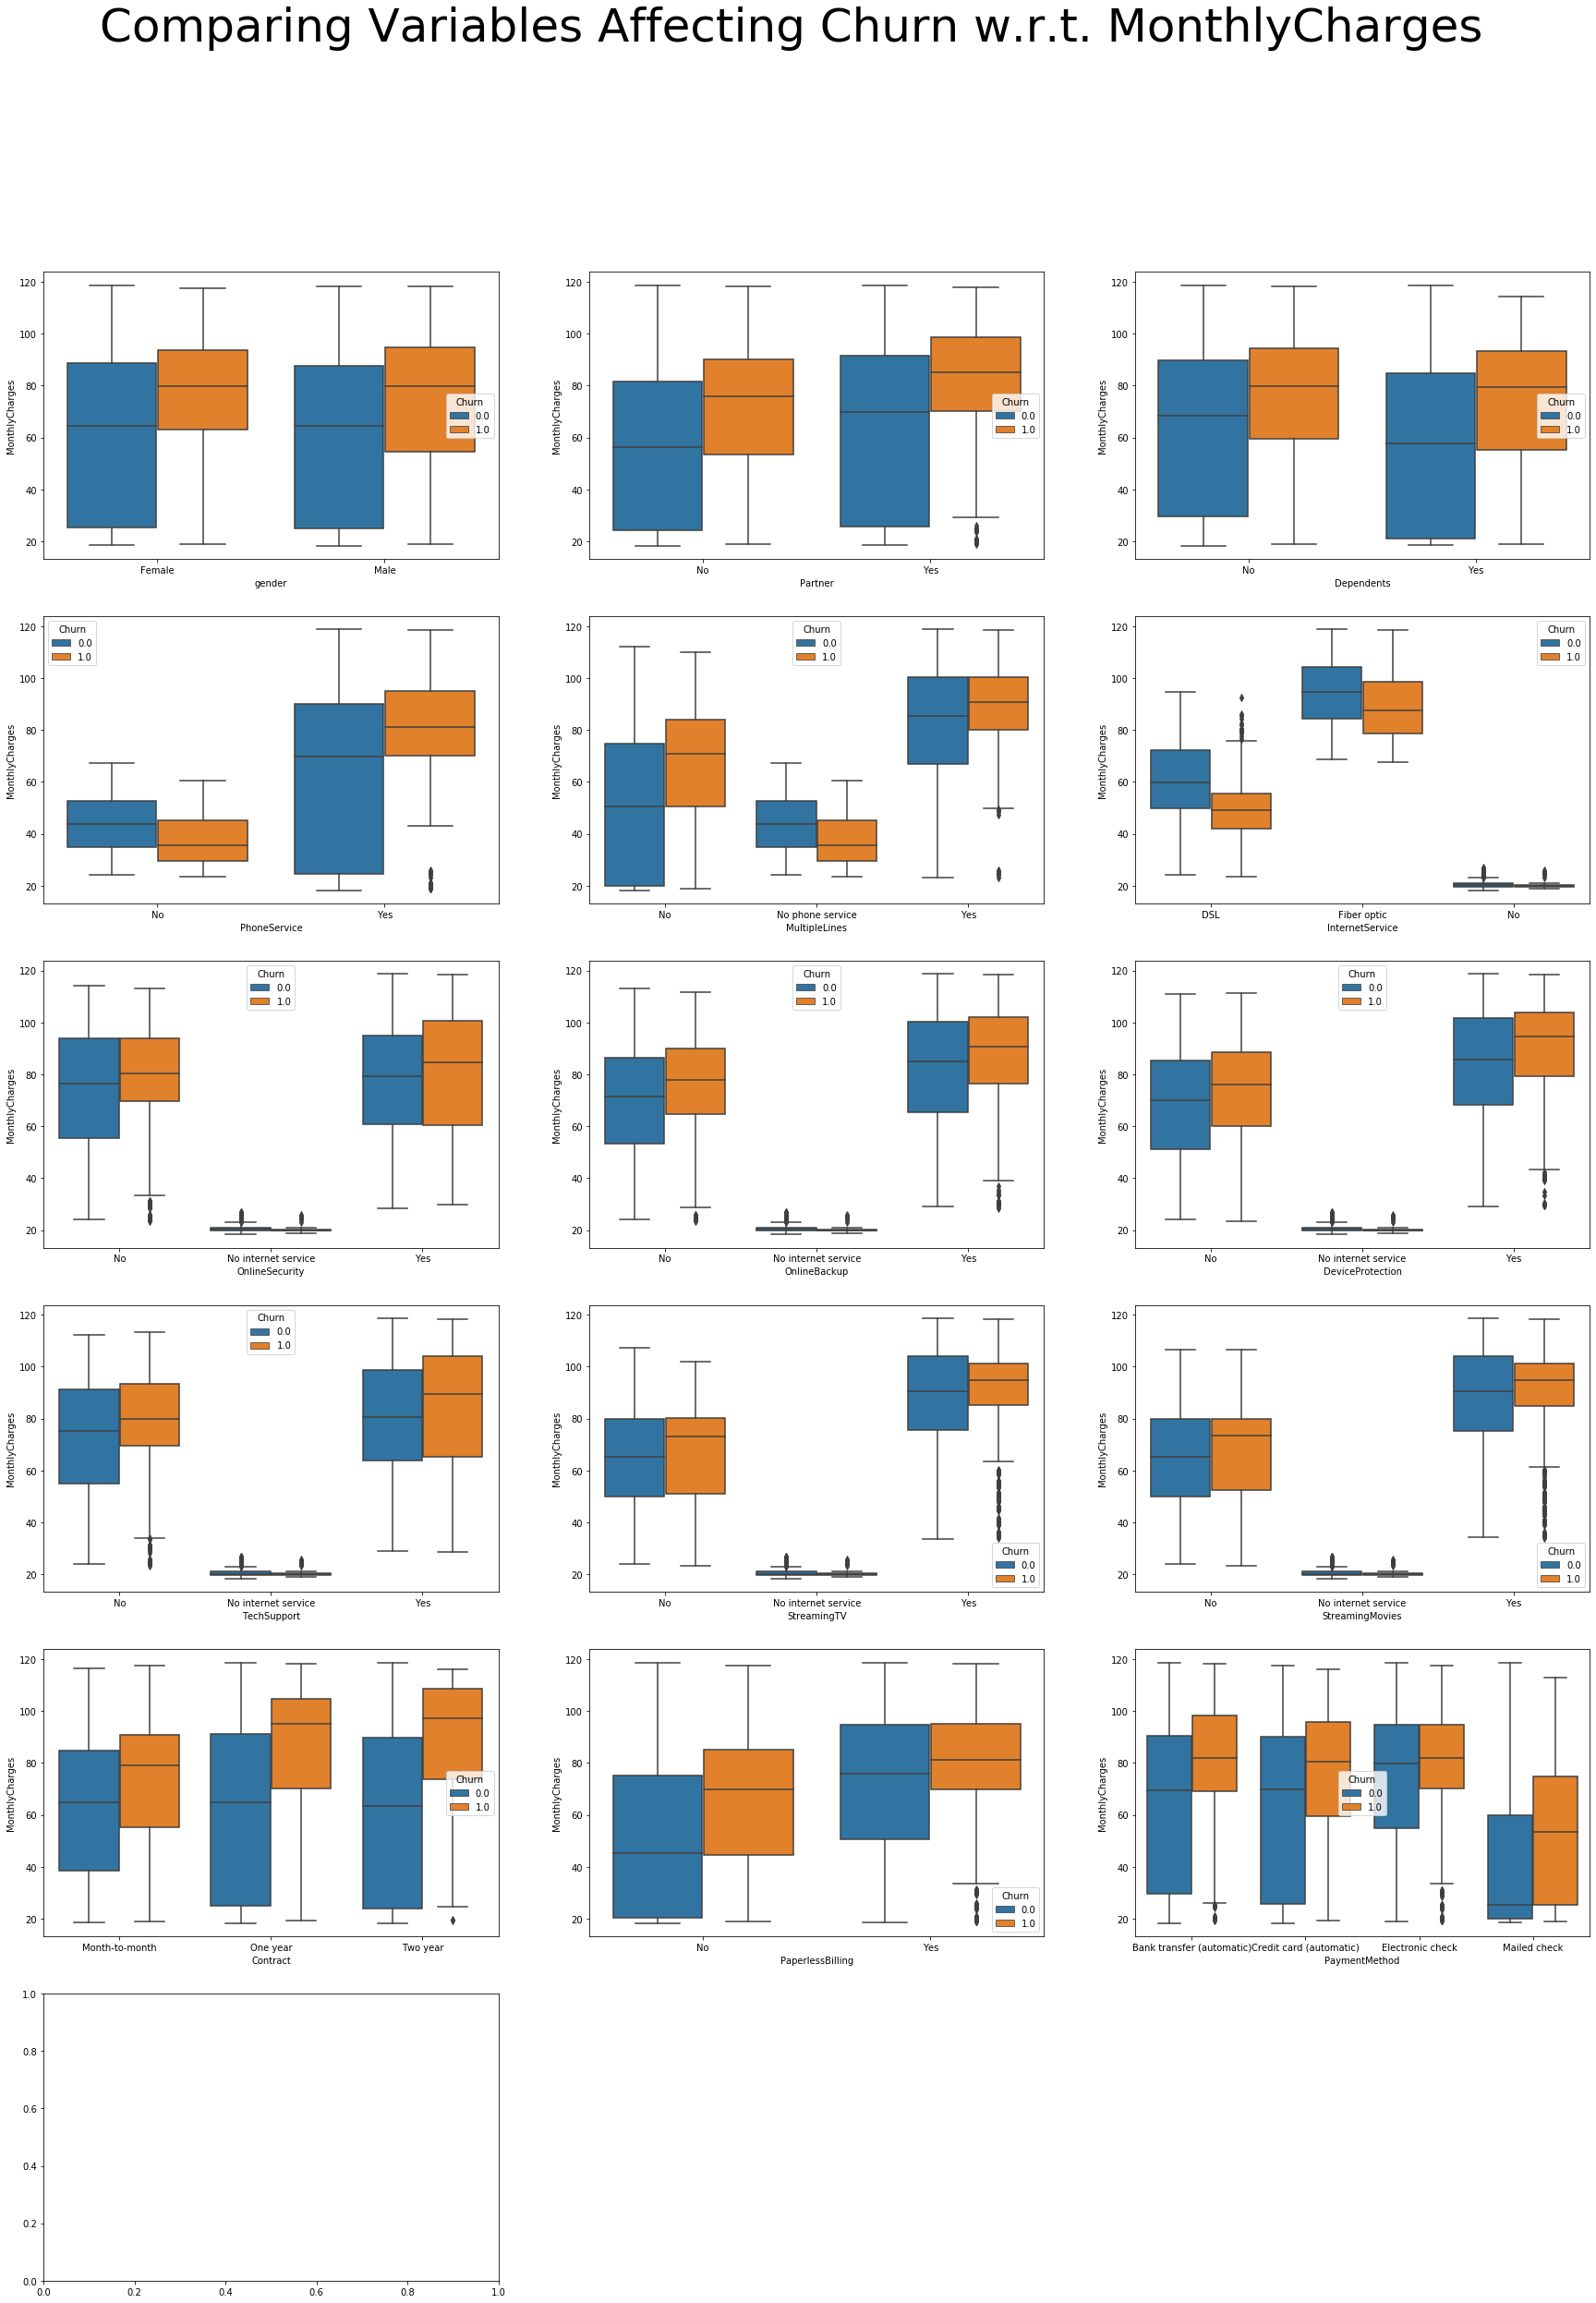

In [44]:
import math
churn_data = [col for col in churn.columns
               if col not in ['customerID','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
melted = churn.drop(columns = ['customerID','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])
                                        
fig, axes = plt.subplots(
            math.ceil(len(churn_data) / 3), 3, figsize = (30,40)
)
axes = axes.flatten()
for prop, ax in zip(melted, axes): 
    sns.boxplot(x = prop, y = 'MonthlyCharges', data= churn, hue = 'Churn', ax = ax)
for ax in axes[len(churn_data):]:
    ax.remove()
plt.suptitle(
    'Comparing Variables Affecting Churn w.r.t. MonthlyCharges', fontsize=50)

#### internet service more likely to affect churn even with lower monthly charges,
#### streamingtv and streamingmovies also affect churn significantly 
#### both above variables indicate poor quality service could be the cause
#### for rest of the variables, the churn is proportional to monthly charges,

Text(0.5, 0.98, 'Comparing Variables Affecting Churn w.r.t. tenure')

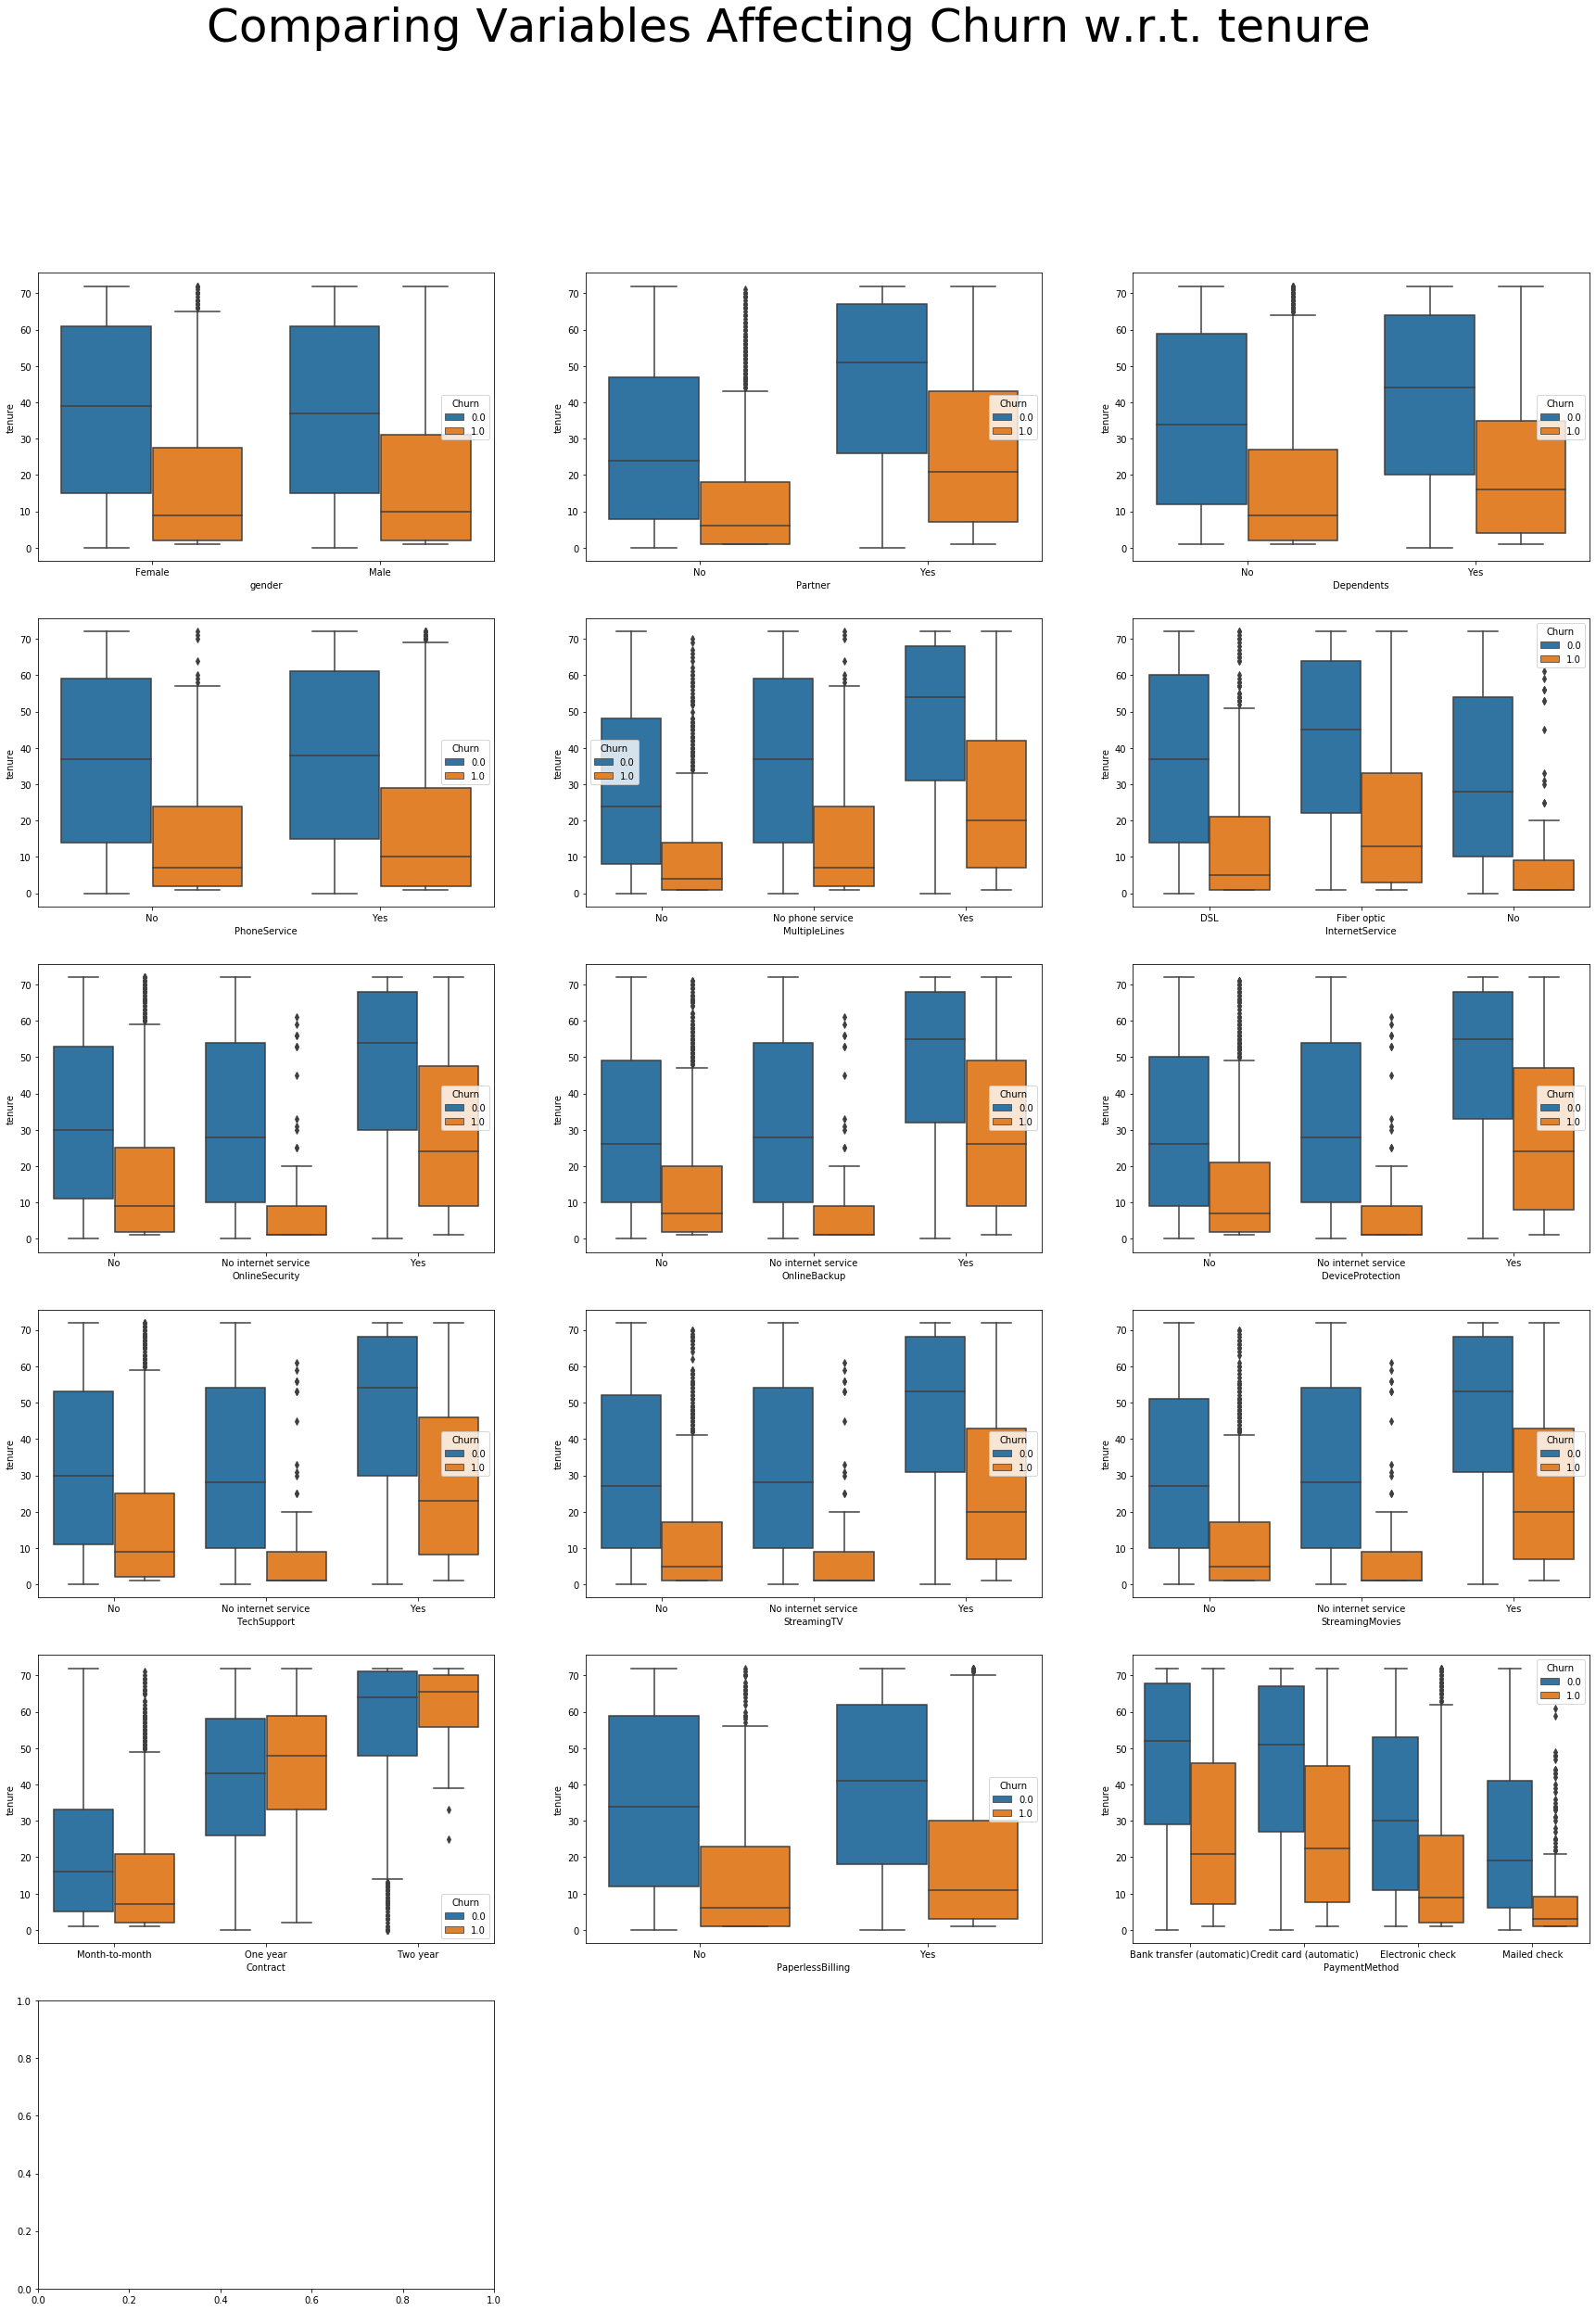

In [45]:
import math
churn_data = [col for col in churn.columns
               if col not in ['customerID','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
melted = churn.drop(columns = ['customerID','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])
                                        
fig, axes = plt.subplots(
            math.ceil(len(churn_data) / 3), 3, figsize = (30,40)
)
axes = axes.flatten()
for prop, ax in zip(melted, axes): 
    sns.boxplot(x = prop, y = 'tenure', data= churn, hue = 'Churn', ax = ax)
for ax in axes[len(churn_data):]:
    ax.remove()
plt.suptitle(
    'Comparing Variables Affecting Churn w.r.t. tenure', fontsize = 50)

#### Churn is accelerated if the customer is not a partner, not a dependent, doesn't have internet service,
#### if the contract is monthly, and if the payment method is by mailed check

In [1]:
### Conclusion: What all did you understand from the above charts

#### 1. Internet service and streaming quality affects churn
#### 2. Contracts of higher duration, along with internet service add-on tend to lower churn
#### 3. Customers should be enticed to not use mailed checks for payments, by awarding points for online payment

### Implement Machine Learning Models

In [13]:
# label encoding important and relevant categorical features for classification
churn_ml = pd.get_dummies(data = churn, columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                                                   'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                                   'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                                                   'PaymentMethod'])

In [14]:
X = churn_ml.drop(columns = ['customerID','tenure','TotalCharges','Churn']).copy()
X.head()

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [15]:
churn['Churn'] = churn['Churn'].cat.codes

In [16]:
churn['Churn'] = churn['Churn'].astype(float)
churn['Churn'].dtypes

dtype('float64')

In [17]:
X = X.apply(pd.to_numeric, errors='coerce')

In [18]:
y = churn['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432, random_state=324)

In [20]:
X_train.shape[0], X_test.shape[0]

(4000, 3043)

In [21]:
X.head()

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


Method: Decision Tree Classifier

In [22]:
# using decision tree classifier to begin with:
churn_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
churn_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
predictions = churn_classifier.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2249
         1.0       0.54      0.57      0.56       794

    accuracy                           0.76      3043
   macro avg       0.70      0.70      0.70      3043
weighted avg       0.77      0.76      0.77      3043



In [25]:
print(confusion_matrix(y_test, predictions))

[[1867  382]
 [ 338  456]]


In [26]:
accuracy_score(y_true = y_test, y_pred = predictions)
# the model predicts if a churn will occur correctly 76% of the time, which is pretty good

0.7633913900755833

Linear Regression

In [27]:
# Linear Regression
churn_LR_regressor = LinearRegression()
churn_LR_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_prediction = churn_LR_regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
RMSE

0.3846150193896688

In [29]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_prediction)

0.23328828182021744

Decision Tree Regression

In [30]:
# Regression using Decision Tree
churn_DT_regressor = DecisionTreeRegressor(max_depth=20)
churn_DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
prediction = churn_DT_regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = prediction))
RMSE

0.5376367210520693

In [32]:
explained_variance_score(y_test, prediction)
# not good accuracy, need to improve the model, best score could be 1.0

-0.49807416186102915

Logistic Regression

In [33]:
churn_Logit_regressor = LogisticRegression(random_state = 0, max_iter=1000)
churn_Logit_regressor.fit(X_train, y_train)

C:\Users\vaibh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = churn_Logit_regressor.predict(X_test)

### Model Evaluation

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2249
         1.0       0.57      0.54      0.56       794

    accuracy                           0.78      3043
   macro avg       0.71      0.70      0.70      3043
weighted avg       0.77      0.78      0.77      3043



In [36]:
print(confusion_matrix(y_test, y_pred))

[[1928  321]
 [ 363  431]]


In [37]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7752218205718041

### Final Conclusions

#### LogistiLogistic regression model provides highest accurary of 77% in predicting churn
#### Assuming better internet service, streaming service, longer term contracts and rewards for online payments are introduced to minimize churn, the future churn data would reveal whether these promotions worked
#### Validating the churn on new data using above classifiers would provide insight into performance of promotions